In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model   #数据模型
from statsmodels.graphics.tsaplots import *
from statsmodels.tsa import stattools #模型工具

%matplotlib inline
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

from arch.unitroot import ADF
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


In [13]:
path = '../YCdata/sh50p.csv'
sh = pd.read_csv(path,index_col='Trddt')
sh.index = pd.to_datetime(sh.index)
sh

,600000,600010,600015,600016,600018,600028,600030,600036,600048,600050,...,601688,601766,601800,601818,601857,601901,601985,601988,601989,601998
Trddt,,,,,,,,,,,,,,,,,,,,,
2010-01-04,9.997,2.260,6.541,4.627,4.775,8.445,17.927,13.174,6.443,6.703,...,-,4.991,-,-,11.284,-,-,3.055,4.591,6.498
2010-01-05,10.072,2.250,6.706,4.708,4.783,8.494,18.804,13.188,6.243,6.937,...,-,4.982,-,-,11.499,-,-,3.090,4.573,6.578
2010-01-06,9.874,2.255,6.461,4.615,4.733,8.311,18.586,12.913,6.237,6.787,...,-,4.947,-,-,11.342,-,-,3.055,4.627,6.393
2010-01-07,9.652,2.201,6.328,4.493,4.602,8.091,18.133,12.578,6.240,6.590,...,-,4.875,-,-,11.267,-,-,2.998,4.573,6.176
2010-01-08,9.761,2.211,6.370,4.539,4.618,8.005,18.483,12.578,6.322,6.674,...,-,4.902,-,-,11.135,-,-,3.012,4.525,6.232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-25,19.320,3.710,11.970,9.354,6.690,5.030,20.790,18.330,11.400,6.250,...,21.41,13.120,13.97,4.34,8.480,9.89,9.66,4.060,9.730,7.640
2015-12-28,18.700,3.620,11.440,9.057,6.560,4.920,19.560,17.840,10.830,6.280,...,20.17,12.790,13.44,4.22,8.370,9.59,9.46,4.020,9.420,7.260
2015-12-29,18.740,3.650,11.800,9.126,6.550,4.960,19.810,17.940,10.950,6.210,...,20.24,12.840,13.47,4.26,8.420,9.75,9.5,4.040,9.470,7.310


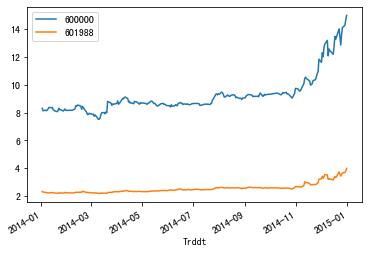

In [14]:

start = '2014-01-01'
end = '2015-01-01'
shform = sh[start:end]
shform.head(10)

paf = shform['600000']
pbf = shform['601988']
mydata = pd.concat([paf,pbf],axis = 1)
mydata.plot()


In [15]:
def SSD(priceX,priceY):
    if priceX is None or priceY is None:
        return None
    else:
        returnx = (priceX-priceX.shift(1))/priceX.shift(1)[1:]
        returny = (priceX-priceY.shift(1))/priceY.shift(1)[1:]
        stdx = (returnx+1).cumprod()
        stdy = (returny+1).cumprod()
        SSD = np.sum((stdx-stdy)**2)
        return SSD
distance = SSD(paf,pbf)
distance

1.4016014372429635e+273

In [17]:
PAflog = np.log(paf) #指数计算
adfA = ADF(PAflog)
print(adfA.summary().as_text())


   Augmented Dickey-Fuller Results   
Test Statistic                  2.392
P-value                         0.999
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [18]:
retA = PAflog.diff()[1:]
retA

Trddt
2014-01-03   -0.020554
2014-01-06    0.005392
2014-01-07   -0.005392
2014-01-08    0.006492
2014-01-09    0.009719
                ...   
2014-12-25    0.057037
2014-12-26    0.035846
2014-12-29    0.012112
2014-12-30    0.027068
2014-12-31    0.021232
Name: 600000, Length: 244, dtype: float64

In [19]:
adfretA = ADF(retA)
print(adfretA.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.888
P-value                         0.002
Lags                               11
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [20]:
PBflog = np.log(pbf) #指数计算
adfB = ADF(PBflog)
print(adfB.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                  3.409
P-value                         1.000
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [22]:
retB = PBflog.diff()[1:]
retB

Trddt
2014-01-03   -0.019040
2014-01-06   -0.011866
2014-01-07   -0.003987
2014-01-08   -0.004003
2014-01-09   -0.004019
                ...   
2014-12-25    0.041067
2014-12-26    0.026470
2014-12-29    0.007860
2014-12-30    0.023217
2014-12-31    0.051913
Name: 601988, Length: 244, dtype: float64

In [23]:
adfretB = ADF(retB)
print(adfretB.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.571
P-value                         0.000
Lags                               11
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Text(0.5, 1.0, '对数价格时间序列图')

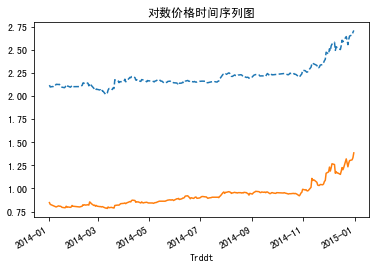

In [24]:
PAflog.plot(label = '601988',style = '--')
PBflog.plot(label = '600000',style = '-')
plt.title('对数价格时间序列图')

Text(0.5, 1.0, '对数价格时间序列图')

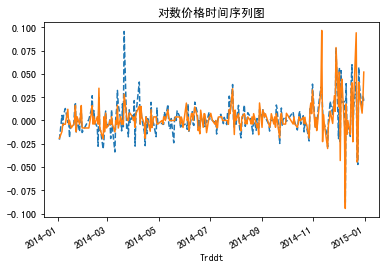

In [25]:
retA.plot(label = '601988',style = '--')
retB.plot(label = '600000',style = '-')
plt.title('收益率时间序列图')

In [26]:
model = sm.OLS(PBflog,sm.add_constant(PAflog))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 601988   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     4560.
Date:                Sat, 25 Apr 2020   Prob (F-statistic):          1.83e-159
Time:                        15:56:20   Log-Likelihood:                 531.15
No. Observations:                 245   AIC:                            -1058.
Df Residuals:                     243   BIC:                            -1051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0476      0.029    -35.723      0.0

In [27]:
model = sm.OLS(PAflog,sm.add_constant(PBflog))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 600000   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     4560.
Date:                Sat, 25 Apr 2020   Prob (F-statistic):          1.83e-159
Time:                        15:56:36   Log-Likelihood:                 509.57
No. Observations:                 245   AIC:                            -1015.
Df Residuals:                     243   BIC:                            -1008.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2269      0.015     83.071      0.0

In [28]:
model = sm.OLS(PBflog,sm.add_constant(PAflog))
results = model.fit()
alpha = results.params[0]
alpha

-1.0476136225676425

In [29]:
beta = results.params[1]
beta

0.8922170924539079

In [30]:
spread = PBflog-beta*PAflog - alpha
spread

Trddt
2014-01-02    0.005857
2014-01-03    0.005156
2014-01-06   -0.011521
2014-01-07   -0.010697
2014-01-08   -0.020491
                ...   
2014-12-25   -0.007232
2014-12-26   -0.012744
2014-12-29   -0.015691
2014-12-30   -0.016625
2014-12-31    0.016345
Length: 245, dtype: float64

Text(0.5, 1.0, '价格差距序列')

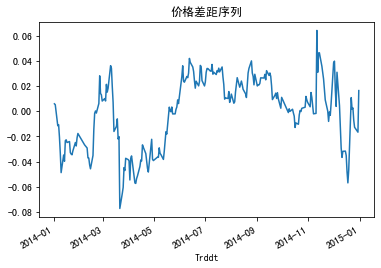

In [31]:
spread.plot()
plt.title('价格差距序列')

In [32]:
adfSpread =ADF(spread,trend = 'nc')
print(adfSpread.summary().as_text()) #平方根的校验

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.183
P-value                         0.001
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/arch/unitroot/unitroot.py:463: FutureWarning: Trend "nc" is deprecated and has been replaced with "n" (for none).
  warnings.warn(


In [33]:
STDA=(1+retA).cumprod() #计算下标价格
STDB=(1+retB).cumprod()


In [35]:
SSD_pair= STDB-STDA
SSD_pair

Trddt
2014-01-03    0.001514
2014-01-06   -0.015407
2014-01-07   -0.013962
2014-01-08   -0.024184
2014-01-09   -0.037629
                ...   
2014-12-25   -0.093747
2014-12-26   -0.110997
2014-12-29   -0.118807
2014-12-30   -0.127925
2014-12-31   -0.082529
Length: 244, dtype: float64

In [36]:
meanSSD_pair = np.mean(SSD_pair)
meanSSD_pair

-0.01189434525521933

In [37]:
stdSSD_pair = np.std(SSD_pair)
stdSSD_pair

0.038793501413793924

In [38]:
thresholdup = meanSSD_pair + stdSSD_pair*1.2
thresholddown = meanSSD_pair - stdSSD_pair*1.2  #计算自定义的上限和下限

  

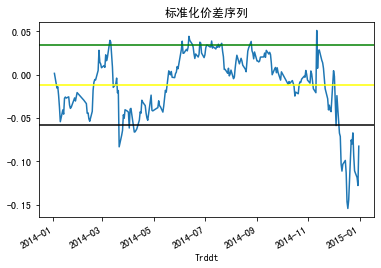

In [42]:
SSD_pair.plot()
plt.title('标准化价差序列')
plt.axhline(y =meanSSD_pair,color = 'yellow')
plt.axhline(y =thresholdup,color = 'green')
plt.axhline(y =thresholddown,color = 'black')

In [45]:
tradeStart = '2015-01-02'
tradeEnd = '2015-06-30'
PAt = sh.loc[tradeStart:tradeEnd,'601988']
PBt = sh.loc[tradeStart:tradeEnd,'600000']

def spreadcalc(priceX,priceY):  #标准差
    if priceX is None or priceY is None:
        return None
    else:
        returnx = (priceX-priceX.shift(1))/priceX.shift(1)[1:]  #收益率
        returny = (priceX-priceY.shift(1))/priceY.shift(1)[1:]
        stdx = (returnx+1).cumprod() #累计收益
        stdy = (returny+1).cumprod()
        spread = stdx - stdy
        return spread

In [46]:
TradeSpread = spreadcalc(PBt,PAt).dropna()
TradeSpread.describe()

count    1.180000e+02
mean    -7.398198e+63
std      6.111506e+64
min     -6.430621e+65
25%     -1.004605e+49
50%     -1.693430e+32
75%     -1.009197e+16
max     -2.621576e+00
dtype: float64

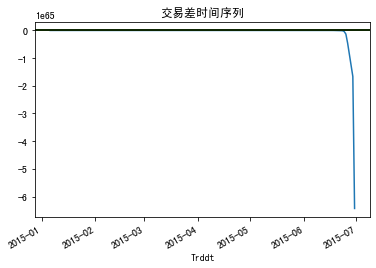

In [47]:
TradeSpread.plot()
plt.title('交易差时间序列')
plt.axhline(y = meanSSD_pair,color = 'yellow')
plt.axhline(y = meanSSD_pair,color = 'green')
plt.axhline(y = meanSSD_pair,color = 'black')

In [48]:
spreadf = PBflog - beta*PAflog - alpha
mu = np.mean(spreadf)
sd = np.std(spreadf)
mu+1.2*sd

0.03322027965912166

In [49]:
mu - 1.2*sd

-0.03322027965912431

In [50]:
CosSpreadT = np.log(PBt) - beta*np.log(PAt) - alpha  
CosSpreadT.describe()

count    119.000000
mean       2.488518
std        0.054398
min        2.376750
25%        2.450080
50%        2.495289
75%        2.531945
max        2.583569
dtype: float64

Text(0.5, 1.0, '交易期间价格差距序列')

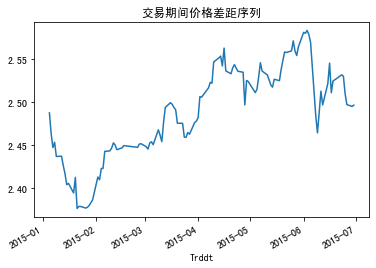

In [52]:
CosSpreadT.plot()
plt.title('交易期间价格差距序列')

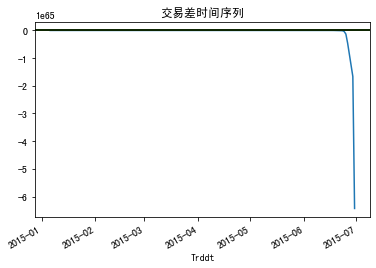

In [54]:
TradeSpread.plot()
plt.title('交易差时间序列')
plt.axhline(y = mu,color = 'yellow')
plt.axhline(y = mu+1.2*sd,color = 'green')
plt.axhline(y = mu-1.2*sd,color = 'black')